In [93]:
import numpy as np
import pandas as pd
pd.set_option('display.max_rows', 10)

import matplotlib.pyplot as plt


import time
import os  

In [94]:
df = pd.read_csv("data_analyst_salaries_clean.csv")

In [95]:
df.head()

,Company,City,employee_as_of,Remote_Flag,years_at_company,years_of_exp,total_comp,base_salary,stock_rsu_comp,annual_target_bonus
0,PwC,"San Francisco, CA",Offer from 03/20/2023,Office,0 yrs,0 yrs,"$95,375","$85,000",--,"$10,375"
1,Avanade,"Chicago, IL",Employee as of 03/20/2023,Remote,2 yrs,10 yrs,"$98,000","$98,000",--,--
2,LinkedIn,"San Francisco, CA",Employee as of 03/20/2023,Hybrid,1 yrs,5 yrs,"$163,750","$122,500","$28,750","$12,500"
3,Best Buy,Minneapolis-St. Paul,Employee as of 03/20/2023,Hybrid,2-4 yrs,5-10 yrs,"$105,000","$95,000",--,"$10,000"
4,American Systems,"Chantilly, VA",Employee as of 03/20/2023,Remote,1 yrs,6 yrs,"$126,000","$121,000",--,"$5,000"


In [96]:
df.shape

(961, 10)

In [97]:
#Split City, State
df["loc_city"] = [el[0] for el in df["City"].str.split(",")]
df["loc_state"] = [el[1] if len(el)>1 else "Null" for el in df["City"].str.split(",")]

In [98]:
df.head(10)

,Company,City,employee_as_of,Remote_Flag,years_at_company,years_of_exp,total_comp,base_salary,stock_rsu_comp,annual_target_bonus,loc_city,loc_state
0,PwC,"San Francisco, CA",Offer from 03/20/2023,Office,0 yrs,0 yrs,"$95,375","$85,000",--,"$10,375",San Francisco,CA
1,Avanade,"Chicago, IL",Employee as of 03/20/2023,Remote,2 yrs,10 yrs,"$98,000","$98,000",--,--,Chicago,IL
2,LinkedIn,"San Francisco, CA",Employee as of 03/20/2023,Hybrid,1 yrs,5 yrs,"$163,750","$122,500","$28,750","$12,500",San Francisco,CA
3,Best Buy,Minneapolis-St. Paul,Employee as of 03/20/2023,Hybrid,2-4 yrs,5-10 yrs,"$105,000","$95,000",--,"$10,000",Minneapolis-St. Paul,Null
4,American Systems,"Chantilly, VA",Employee as of 03/20/2023,Remote,1 yrs,6 yrs,"$126,000","$121,000",--,"$5,000",Chantilly,VA
5,Bridgewater Associates,"Westport, CT",Employee as of 03/19/2023,Office,1 yr,1 yr,"$110,000","$85,000",--,"$25,000",Westport,CT
6,Goldman Sachs,"New York, NY",Employee as of 03/19/2023,Hybrid,5-10 yrs,5-10 yrs,"$145,000","$145,000",--,--,New York,NY
7,One Medical,"San Francisco, CA",Employee as of 03/17/2023,Remote,1 yrs,5 yrs,"$135,000","$126,000","$9,000",--,San Francisco,CA
8,Capital One,"West McLean, VA",Employee as of 03/17/2023,Office,2 yrs,2 yrs,"$123,300","$120,000",--,"$3,300",West McLean,VA
9,Nike,Portland,Employee as of 03/17/2023,Hybrid,0-1 yrs,0-1 yrs,"$83,600","$76,000",--,"$7,600",Portland,Null


In [99]:
#Convert salaries to numbers
df["total_comp"]  = df["total_comp"].str.replace("$","")
df["total_comp"] = df["total_comp"].str.replace(",","")

In [100]:
df["base_salary"]  = df["base_salary"].str.replace("$","")
df["base_salary"] = df["base_salary"].str.replace(",","")

In [101]:
df["stock_rsu_comp"]  = df["stock_rsu_comp"].str.replace("$","")
df["stock_rsu_comp"] = df["stock_rsu_comp"].str.replace(",","")

In [102]:
df["annual_target_bonus"]  = df["annual_target_bonus"].str.replace("$","")
df["annual_target_bonus"] = df["annual_target_bonus"].str.replace(",","")

In [103]:
df["stock_rsu_comp"] = df["stock_rsu_comp"].str.replace("--",'0')
df["annual_target_bonus"] = df["annual_target_bonus"].str.replace("--",'0')

In [104]:
df["annual_target_bonus"] = df["annual_target_bonus"].str.replace("y1",'0')

In [105]:
df[['total_comp', 'base_salary','stock_rsu_comp','annual_target_bonus']] = df[['total_comp', 'base_salary','stock_rsu_comp','annual_target_bonus']].apply(pd.to_numeric)

In [106]:
df["Company"].value_counts()

hidden                    90
Amazon                    45
Capital One               38
JPMorgan Chase            23
Accenture                 18
                          ..
Gusto                      1
Syrencloud                 1
Warner Bros. Discovery     1
Charles Schwab             1
MetLife                    1
Name: Company, Length: 462, dtype: int64

In [107]:
df["loc_city"].value_counts()

New York          141
San Francisco      61
Seattle            57
Chicago            44
Boston             42
                 ... 
Franklin            1
North Chicago       1
Benton Harbor       1
Mckinney            1
West Lafayette      1
Name: loc_city, Length: 172, dtype: int64

In [108]:
df["loc_state"].value_counts()

 CA    176
 NY    143
 TX     99
 WA     65
 VA     53
      ... 
 KY      1
 AL      1
 SC      1
 LA      1
 HI      1
Name: loc_state, Length: 39, dtype: int64

In [ ]:
#df_sals_gte_10

In [109]:
df["total_comp"].describe()

count       961.000000
mean     118988.503642
std       54130.454170
min       31200.000000
25%       81400.000000
50%      107250.000000
75%      137000.000000
max      380000.000000
Name: total_comp, dtype: float64

In [110]:
print(df["total_comp"].min())
print(df["total_comp"].max())
print(df["total_comp"].median())

31200
380000
107250.0


In [111]:
print(df["base_salary"].min())
print(df["base_salary"].max())
print(df["base_salary"].median())

31200
300000
100000.0


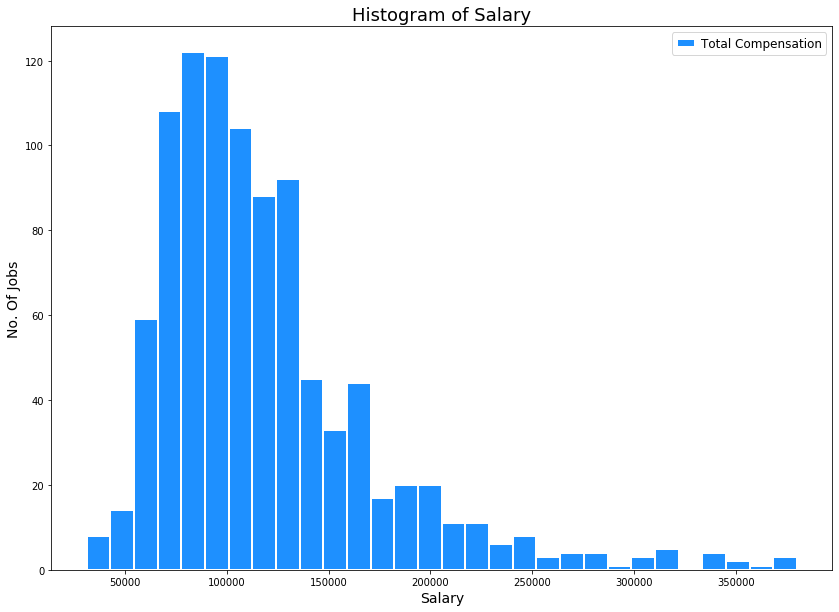

In [20]:
#from scipy.stats import norm
plt.figure(figsize=(14, 10))



#plt.hist(df["base_salary"],bins=30, color='sandybrown', alpha=.5, label= "Base Salary",
#                                           edgecolor='white', linewidth=2)

plt.hist(df["total_comp"],bins=30, color='dodgerblue', alpha=1, label = "Total Compensation",
                                            edgecolor='white', linewidth=2)


plt.xlabel('Salary', fontsize=14)
plt.ylabel('No. Of Jobs', fontsize=14)


plt.legend(loc='upper right',fontsize=12, handlelength=1.5, handletextpad=0.5)


# set the font size of the title
plt.title('Histogram of Salary', fontsize=18)

#plt.savefig("salary_host.png",bbox_inches='tight')

# display the plot
plt.show()

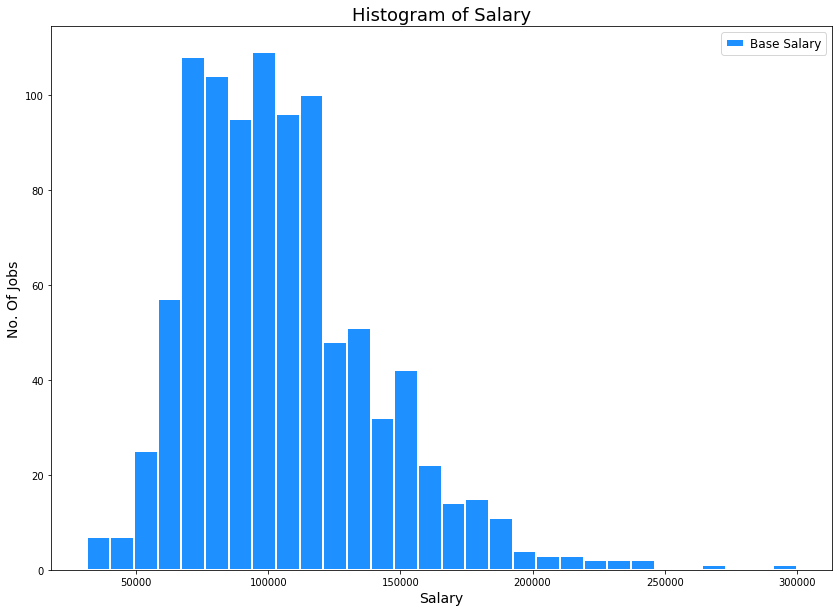

In [22]:
#from scipy.stats import norm
plt.figure(figsize=(14, 10))

plt.hist(df["base_salary"],bins=30, color='dodgerblue', alpha=1, label= "Base Salary",
                                         edgecolor='white', linewidth=2)



plt.xlabel('Salary', fontsize=14)
plt.ylabel('No. Of Jobs', fontsize=14)


plt.legend(loc='upper right',fontsize=12, handlelength=1.5, handletextpad=0.5)


# set the font size of the title
plt.title('Histogram of Salary', fontsize=18)

#plt.savefig("salary_host.png",bbox_inches='tight')

# display the plot
plt.show()

In [71]:
salary_by_state = df.groupby(["loc_state"]).agg({'total_comp' : ['median','count'] })

In [72]:
salary_by_state = df.groupby(["loc_state"]).median()

In [73]:
salary_by_state = df.groupby(["loc_state"]).median()
salary_by_state =  salary_by_state.sort_values("total_comp",ascending=False).reset_index()
salary_by_state = salary_by_state[salary_by_state["loc_state"]!="Null"]

salary_by_city = df.groupby(["loc_city"]).median()
salary_by_city =  salary_by_city.sort_values("total_comp",ascending=False).reset_index()

In [74]:
salary_by_state.head()

,loc_state,total_comp,base_salary,stock_rsu_comp,annual_target_bonus,yoe_clean
0,CA,138620.0,120000.0,0.0,0.0,4.0
1,SC,133300.0,124000.0,0.0,9300.0,5.0
2,WA,121000.0,109000.0,0.0,0.0,4.0
3,MA,121000.0,115000.0,0.0,0.0,5.0
4,OR,118000.0,115000.0,0.0,0.0,5.0


In [75]:
salary_by_state_two =  df.groupby(["loc_state"]).agg({'total_comp' : ['median','count'], 'base_salary':['median'] })
salary_by_state_two.columns = salary_by_state_two.columns.droplevel(0)
salary_by_state_two.columns = ["median_total_comp","number_of_salaries","median_base_salary"]

In [76]:
#Only consider states with atleast 10 Salaries reported.
salary_by_state_two_gte_ten = salary_by_state_two[salary_by_state_two["number_of_salaries"] >= 10]

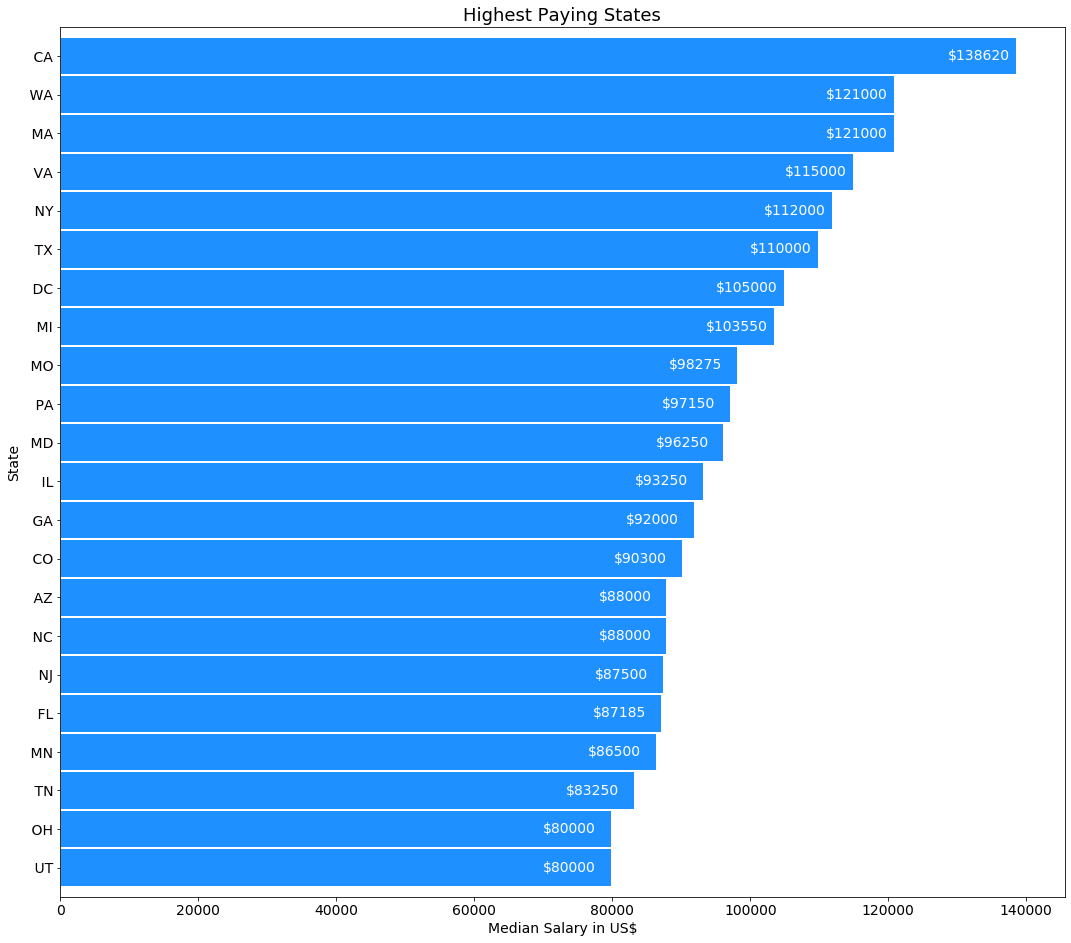

In [78]:
ax = salary_by_state_two_gte_ten["median_total_comp"].sort_values(ascending=True).plot.barh(figsize=(18, 16), color='dodgerblue',
                                            edgecolor='white', linewidth=2, width = 1, alpha = 1)

for i, v in enumerate(salary_by_state_two_gte_ten["median_total_comp"].sort_values(ascending=True)):
    ax.text(v - 10000, i, '$' + str(int(v)), color='white', fontsize=14, ha='left', va='center')



plt.tick_params(axis='x', labelsize=14)
plt.tick_params(axis='y', labelsize=14)


plt.xlabel('Median Salary in US$', fontsize=14)
plt.ylabel('State', fontsize=14)

# set the font size of the title
plt.title('Highest Paying States', fontsize=18)

plt.savefig("salary_by_state.png",bbox_inches='tight')

# display the plot
plt.show()

In [ ]:
#By City

In [79]:
salary_by_city_two =  df.groupby(["City"]).agg({'total_comp' : ['median','count'], 'base_salary':['median'] })
salary_by_city_two.columns = salary_by_city_two.columns.droplevel(0)
salary_by_city_two.columns = ["median_total_comp","number_of_salaries","median_base_salary"]

In [80]:
salary_by_city_two_top_paying =  salary_by_city_two["median_total_comp"].sort_values(ascending=False)[1:15].to_frame()
salary_by_city_two_lowest_paying =  salary_by_city_two["median_total_comp"].sort_values(ascending=True)[1:15].to_frame()

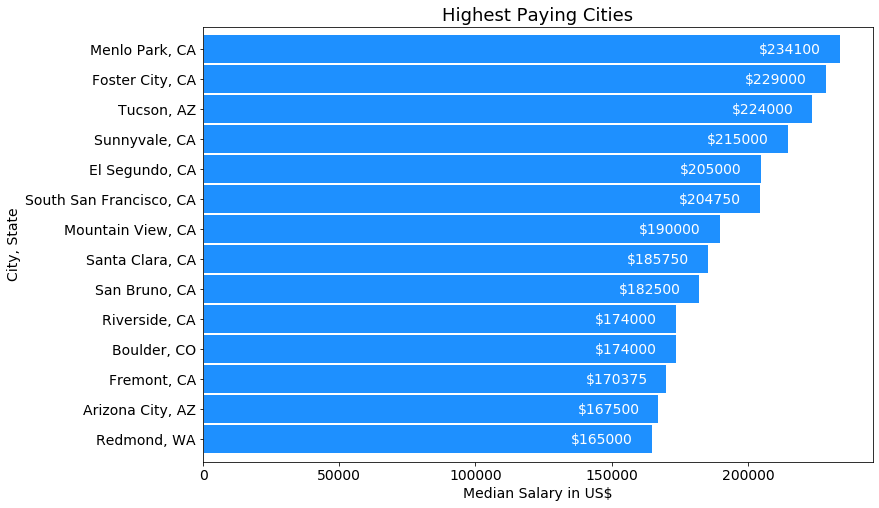

In [81]:
ax = salary_by_city_two_top_paying["median_total_comp"].sort_values(ascending=True).plot.barh(figsize=(12, 8), color='dodgerblue',
                                            edgecolor='white', linewidth=2, width = 1, alpha = 1)

for i, v in enumerate(salary_by_city_two_top_paying["median_total_comp"].sort_values(ascending=True)):
    ax.text(v - 30000, i, '$' + str(int(v)), color='white', fontsize=14, ha='left', va='center')



plt.tick_params(axis='x', labelsize=14)
plt.tick_params(axis='y', labelsize=14)


plt.xlabel('Median Salary in US$', fontsize=14)
plt.ylabel('City, State', fontsize=14)

# set the font size of the title
plt.title('Highest Paying Cities', fontsize=18)

plt.savefig("salary_highest_paying_cities.png",bbox_inches='tight')

# display the plot
plt.show()

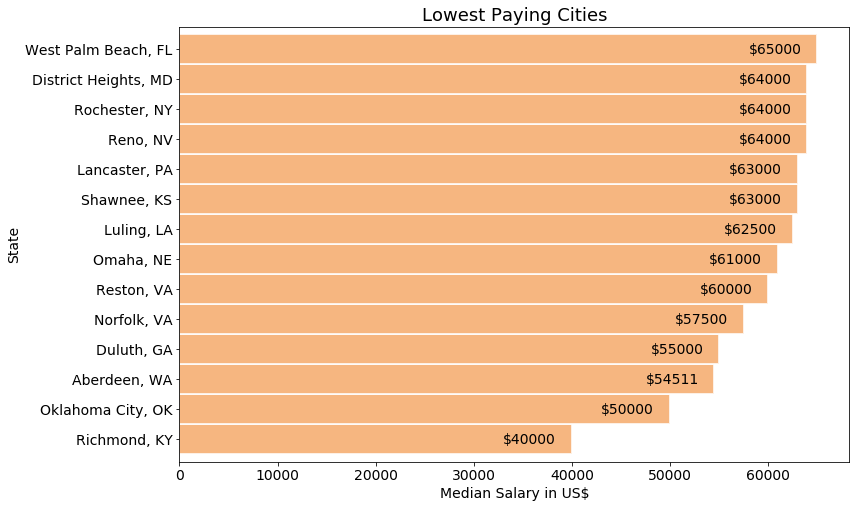

In [82]:
ax = salary_by_city_two_lowest_paying["median_total_comp"].sort_values(ascending=True).plot.barh(figsize=(12, 8), color='sandybrown',
                                            edgecolor='white', linewidth=2, width = 1, alpha = .8)

for i, v in enumerate(salary_by_city_two_lowest_paying["median_total_comp"].sort_values(ascending=True)):
    ax.text(v - 7000, i, '$' + str(int(v)), color='black', fontsize=14, ha='left', va='center')



plt.tick_params(axis='x', labelsize=14)
plt.tick_params(axis='y', labelsize=14)


plt.xlabel('Median Salary in US$', fontsize=14)
plt.ylabel('State', fontsize=14)

# set the font size of the title
plt.title('Lowest Paying Cities', fontsize=18)

plt.savefig("salary_lowest_paying_cities.png",bbox_inches='tight')

# display the plot
plt.show()

In [83]:
salary_by_company =  df.groupby(["Company"]).agg({'total_comp' : ['median','count'], 'base_salary':['median'] })
salary_by_company.columns = salary_by_company.columns.droplevel(0)
salary_by_company.columns = ["median_total_comp","number_of_salaries","median_base_salary"]

In [86]:
salary_by_company_gte_5 = salary_by_company[salary_by_company["number_of_salaries"] >= 5]

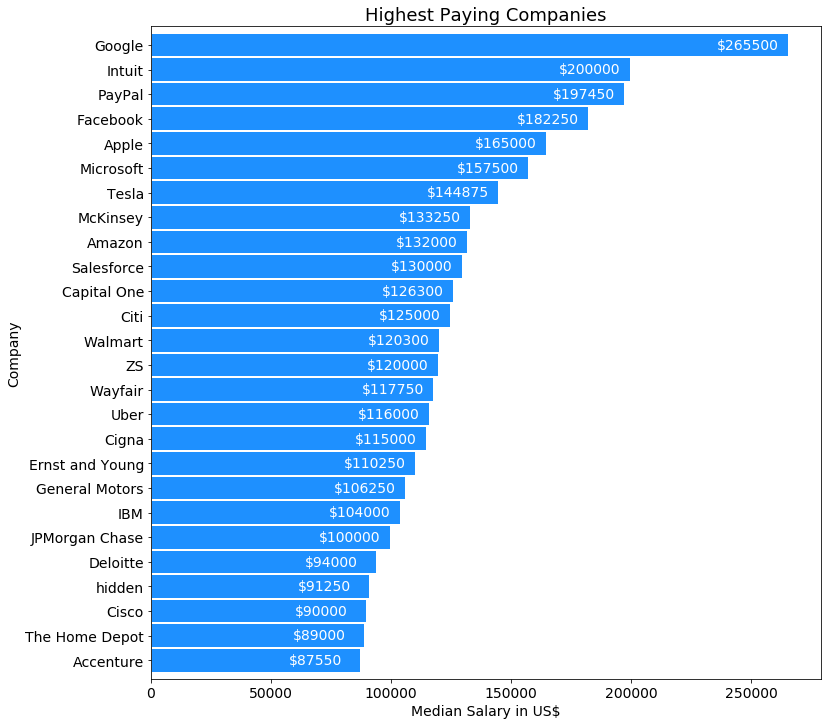

In [88]:
ax = salary_by_company_gte_5["median_total_comp"].sort_values(ascending=True).plot.barh(figsize=(12, 12), color='dodgerblue',
                                            edgecolor='white', linewidth=2, width = 1, alpha = 1)

for i, v in enumerate(salary_by_company_gte_5["median_total_comp"].sort_values(ascending=True)):
    ax.text(v - 30000, i, '$' + str(int(v)), color='white', fontsize=14, ha='left', va='center')



plt.tick_params(axis='x', labelsize=14)
plt.tick_params(axis='y', labelsize=14)


plt.xlabel('Median Salary in US$', fontsize=14)
plt.ylabel('Company', fontsize=14)

# set the font size of the title
plt.title('Highest Paying Companies', fontsize=18)

plt.savefig("highest_paying_companies.png",bbox_inches='tight')

# display the plot
plt.show()

In [90]:
salary_by_remote =  df.groupby(["Remote_Flag"]).agg({'total_comp' : ['median','count'], 'base_salary':['median'] })
salary_by_remote.columns = salary_by_remote.columns.droplevel(0)
salary_by_remote.columns = ["Median of Total Compensation","No. of Salaries","Median of Base Salary"]
salary_by_remote.index.names=["Location Type"]

In [91]:
salary_by_remote

,Median of Total Compensation,No. of Salaries,Median of Base Salary
Location Type,,,
Hybrid,105000,298,98000
Office,110000,349,101952
Remote,105000,314,99850


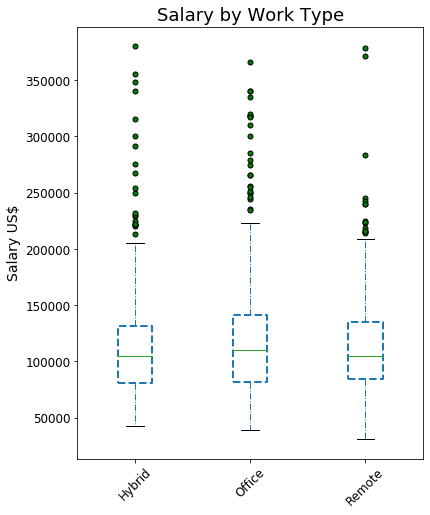

In [92]:
# Customize the boxplot
boxprops = dict(linestyle='--', linewidth=2, color='red')
whiskerprops = dict(linestyle='-.', linewidth=1, color='blue')
flierprops = dict(marker='o', markersize=5, markerfacecolor='green')

# Create a boxplot breakdown by category
df.boxplot(column='total_comp', by='Remote_Flag',
           boxprops=boxprops, whiskerprops=whiskerprops,
           flierprops=flierprops, fontsize=12, rot=45, figsize = (6,8))



plt.xlabel('', fontsize=14)
plt.ylabel('Salary US$', fontsize=14)

plt.suptitle('')
plt.title('Salary by Work Type', fontsize=18)

plt.grid(b=False)

# Show the plot
plt.show()

In [23]:
#Clean Years of experience.
df["yoe_clean"] = [el.split("-")[0] for el in df["years_of_exp"].str.replace("yrs|yr","")]
df["yoe_clean"] = [int(el.split("+")[0]) for el in df["yoe_clean"]]

In [24]:
df["yoe_bucket_one"]= pd.cut(df["yoe_clean"],[-10,2,5,10,50],labels=["0 to 2","2 to 5","5 to 10","GT10"])

In [25]:
df["yoe_bucket_one"].value_counts()

2 to 5     356
0 to 2     328
5 to 10    201
GT10        76
Name: yoe_bucket_one, dtype: int64

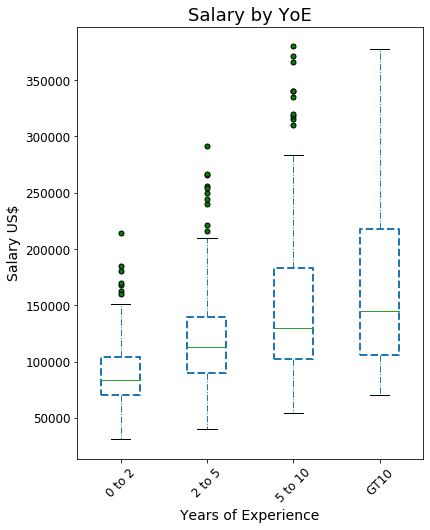

In [26]:
# Customize the boxplot
boxprops = dict(linestyle='--', linewidth=2, color='red')
whiskerprops = dict(linestyle='-.', linewidth=1, color='blue')
flierprops = dict(marker='o', markersize=5, markerfacecolor='green')

# Create a boxplot breakdown by category
df.boxplot(column='total_comp', by='yoe_bucket_one',
           boxprops=boxprops, whiskerprops=whiskerprops,
           flierprops=flierprops, fontsize=12, rot=45, figsize = (6,8),grid=None)




plt.xlabel('Years of Experience', fontsize=14)
plt.ylabel('Salary US$', fontsize=14)

plt.suptitle('')
plt.title('Salary by YoE', fontsize=18)

plt.grid(b=False)

# Show the plot
plt.show()

In [27]:
salary_by_yoe =  df.groupby(["yoe_bucket_one"]).agg({'total_comp' : ['median','count'], 'base_salary':['median'] })
salary_by_yoe.columns = salary_by_yoe.columns.droplevel(0)
salary_by_yoe.columns = ["Median of Total Compensation","No. of Salaries","Median of Base Salary"]

In [28]:
salary_by_yoe.index.names=["Years of Experience"]

In [29]:
salary_by_yoe

,Median of Total Compensation,No. of Salaries,Median of Base Salary
Years of Experience,,,
0 to 2,84000,328,80000
2 to 5,112750,356,105000
5 to 10,130000,201,120000
GT10,145000,76,135000


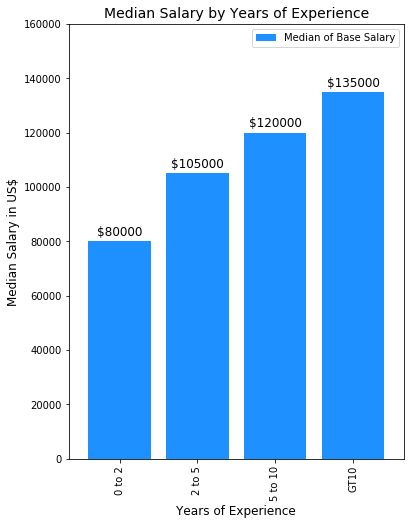

In [69]:
ax = salary_by_yoe.plot(figsize=(6, 8),y='Median of Base Salary', kind='bar', width = .8, color='dodgerblue')

for i, v in enumerate(salary_by_yoe["Median of Base Salary"]):
    plt.text(i,v+2000, '$' + str(int(v)), color='black', fontsize=12,ha = 'center')
    
ax.set_ylim(0, 160000)

plt.tick_params(axis='x', labelsize=10)
plt.tick_params(axis='y', labelsize=10)    
    
plt.xlabel('Years of Experience', fontsize=12)
plt.ylabel('Median Salary in US$', fontsize=12)

# set the font size of the title
plt.title('Median Salary by Years of Experience', fontsize=14)

plt.savefig("median_salary_by_yoe.png")

plt.show()



In [63]:
#0-2 years experience salaries only
df_beginner=  df[df["yoe_bucket_one"]=="0 to 2"]

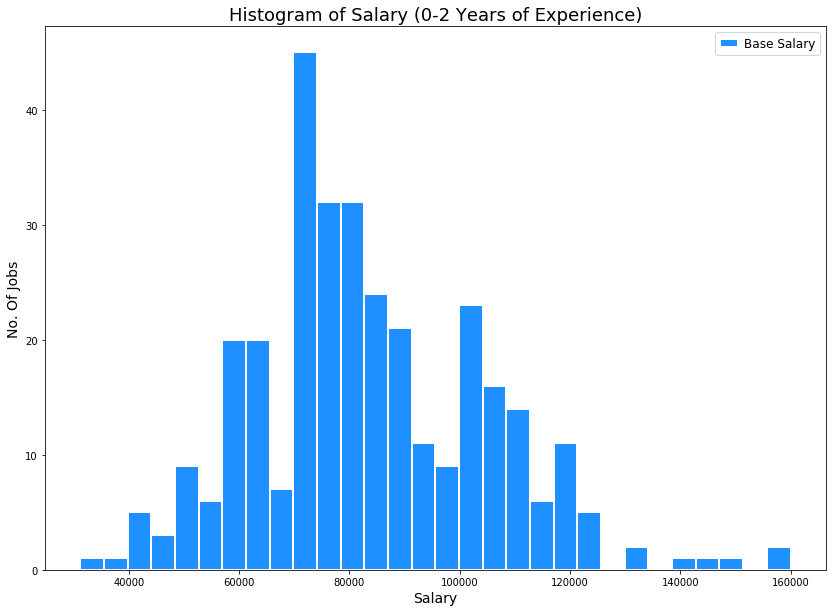

In [64]:
#from scipy.stats import norm
plt.figure(figsize=(14, 10))

plt.hist(df_beginner["base_salary"],bins=30, color='dodgerblue', alpha=1, label= "Base Salary",
                                         edgecolor='white', linewidth=2)



plt.xlabel('Salary', fontsize=14)
plt.ylabel('No. Of Jobs', fontsize=14)


plt.legend(loc='upper right',fontsize=12, handlelength=1.5, handletextpad=0.5)


# set the font size of the title
plt.title('Histogram of Salary (0-2 Years of Experience)', fontsize=18)

#plt.savefig("salary_host.png",bbox_inches='tight')

# display the plot
plt.show()